In [ ]:
file_location = "/databricks-datasets/cs110x/ml-20m/data-001/movies.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_movies = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_movies)

In [ ]:
file_location = "/databricks-datasets/cs110x/ml-20m/data-001/ratings.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_ratings = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df_ratings)

In [ ]:
from pyspark.sql.types import *
movies_schema = StructType([
  StructField('movieId', IntegerType()),
  StructField('title', StringType()),
  StructField('genres', StringType())
])

ratings_schema = StructType([
  StructField('userId', IntegerType()),
  StructField('movieId', IntegerType()),
  StructField('rating', FloatType())  
])


In [ ]:
(df_ratings_70, df_ratings_30) = df_ratings.randomSplit([0.7, 0.3], 50)
print(df_ratings_70.count())
print(df_ratings_30.count())
df_ratings_train = df_ratings_70.cache()
df_ratings_test = df_ratings_30.cache()

14001658
5998605


In [ ]:
from pyspark.ml.recommendation import ALS

als = ALS().setMaxIter(6).setRegParam(0.1) \
  .setUserCol('userId') \
  .setItemCol('movieId') \
  .setRatingCol('rating') \
  .setRank(6)

model = als.fit(df_ratings_train)

In [ ]:
df_predicted_ratings = model.transform(df_ratings_test)
df_predicted_ratings = df_predicted_ratings.filter(df_predicted_ratings.prediction != float('nan'))
display(df_predicted_ratings)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

regr_eval = RegressionEvaluator(predictionCol='prediction', labelCol='rating', metricName='rmse')
error = regr_eval.evaluate(df_predicted_ratings)
print(f'RMSE Error: {error}')

RMSE Error: 0.8129786960553322


In [ ]:
from pyspark.ml.recommendation import ALS

Maxiter = [x*3 for x in range(1, 8)]

result_maxiter = []

for i in Maxiter:

    als = ALS().setMaxIter(i) \
        .setRegParam(0.1) \
        .setUserCol('userId') \
        .setItemCol('movieId') \
        .setRatingCol('rating') \
        .setRank(6)

    model = als.fit(df_ratings_train)

    df_predicted_ratings = model.transform(df_ratings_test)
    df_predicted_ratings = df_predicted_ratings.filter(df_predicted_ratings.prediction != float('nan'))
    display(df_predicted_ratings)

    from pyspark.ml.evaluation import RegressionEvaluator

    regr_eval = RegressionEvaluator(predictionCol='prediction', labelCol='rating', metricName='rmse')
    error = regr_eval.evaluate(df_predicted_ratings)
    print(f'RMSE Error: {error}')

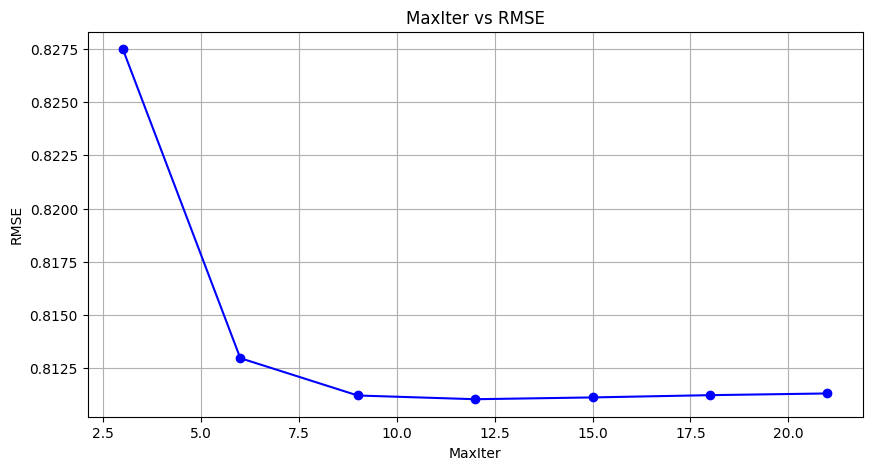

In [ ]:
import matplotlib.pyplot as plt

max_iter_values = [3, 6, 9, 12, 15, 18, 21]
rmse_errors = [0.8274771044788584, 0.8129786960553322, 0.8112258284707741, 0.8110509823804921, 0.811135408079111, 0.8112416241002153, 0.8113216684594903]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(max_iter_values, rmse_errors, marker='o', linestyle='-', color='b')
ax.set_xlabel('MaxIter')
ax.set_ylabel('RMSE')
ax.set_title('MaxIter vs RMSE')

plt.grid(True)
plt.show()


In [ ]:
from pyspark.ml.recommendation import ALS

Rank = [x*3 for x in range(1, 8)]

result_rank = []

for i in Rank:

    als = ALS().setMaxIter(6) \
        .setRegParam(0.1) \
        .setUserCol('userId') \
        .setItemCol('movieId') \
        .setRatingCol('rating') \
        .setRank(i)

    model = als.fit(df_ratings_train)

    df_predicted_ratings = model.transform(df_ratings_test)
    df_predicted_ratings = df_predicted_ratings.filter(df_predicted_ratings.prediction != float('nan'))
    display(df_predicted_ratings)

    from pyspark.ml.evaluation import RegressionEvaluator

    regr_eval = RegressionEvaluator(predictionCol='prediction', labelCol='rating', metricName='rmse')
    error = regr_eval.evaluate(df_predicted_ratings)
    print(f'RMSE Error: {error}')

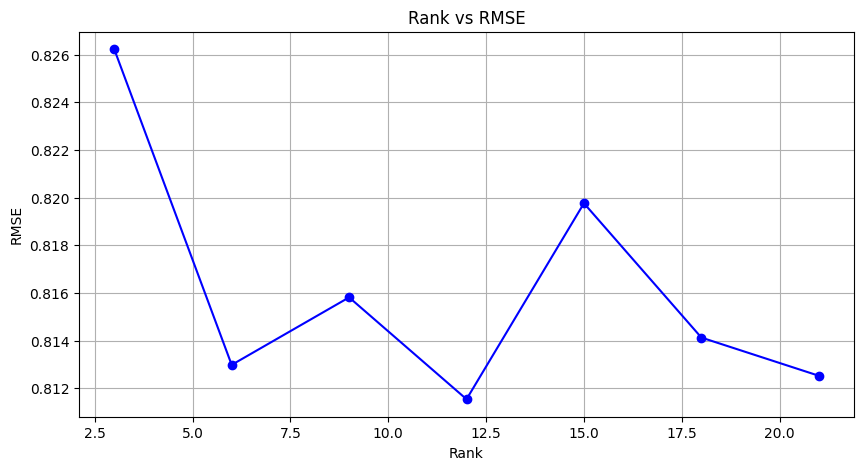

In [ ]:
import matplotlib.pyplot as plt

rank_values = [3, 6, 9, 12, 15, 18, 21]
rmse_errors = [0.8262214788397516, 0.8129786960553319, 0.8158107660504955, 0.8115380901161446, 0.8197587256863531, 0.8141245864175524, 0.8125231449338672]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(rank_values, rmse_errors, marker='o', linestyle='-', color='b')
ax.set_xlabel('Rank')
ax.set_ylabel('RMSE')
ax.set_title('Rank vs RMSE')

plt.grid(True)
plt.show()

In [ ]:
from pyspark.ml.recommendation import ALS

regparams = [float(x*3 /100 ) for x in range(1, 8)]

result_regparams = []

for i in Rank:

    als = ALS().setMaxIter(6) \
        .setRegParam(i) \
        .setUserCol('userId') \
        .setItemCol('movieId') \
        .setRatingCol('rating') \
        .setRank(6)

    model = als.fit(df_ratings_train)

    df_predicted_ratings = model.transform(df_ratings_test)
    df_predicted_ratings = df_predicted_ratings.filter(df_predicted_ratings.prediction != float('nan'))

    from pyspark.ml.evaluation import RegressionEvaluator

    regr_eval = RegressionEvaluator(predictionCol='prediction', labelCol='rating', metricName='rmse')
    error = regr_eval.evaluate(df_predicted_ratings)
    print(f'RMSE Error: {error}')

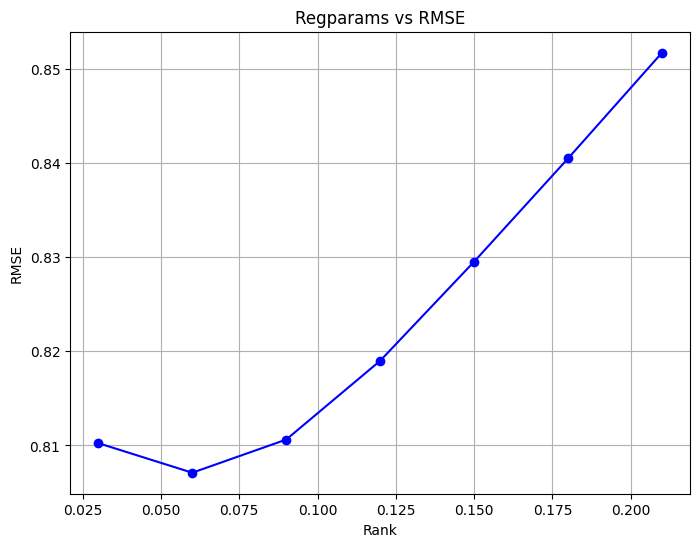

In [ ]:
import matplotlib.pyplot as plt

regparams_values = [0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]
rmse_errors = (0.8102452265506015, 0.8071010770775726, 0.8106251227385811, 0.8189998881775662, 0.8295344789623986, 0.8405089566764932, 0.8517476235497347)

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height according to your preference
ax.plot(regparams_values, rmse_errors, marker='o', linestyle='-', color='b')
ax.set_xlabel('Rank')
ax.set_ylabel('RMSE')
ax.set_title('Regparams vs RMSE')

plt.grid(True)
plt.show()


In [ ]:
my_user_id = 0

my_rated_movies = [
    (my_user_id, 318, 5), # Shawshank redemption
    (my_user_id, 908, 4), # North by Northwest (1959)
    (my_user_id, 858, 5), # Godfather, The (1972)
    (my_user_id, 2019, 5), # Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
    (my_user_id, 912, 5), # Casablanca (1942)
    (my_user_id, 1250, 3), # Bridge on the River Kwai, The (1957)
    (my_user_id, 2324, 5), # Life Is Beautiful (La Vita ? bella) (1997)
    (my_user_id, 1233, 3), # Boat, The (Das Boot) (1981)
    (my_user_id, 593, 4), # Silence of the Lambs, The (1991)
    (my_user_id, 1262, 3), # Great Escape, The (1963)
]

In [ ]:
df_my_ratings = sqlContext.createDataFrame(my_rated_movies, ['userId', 'movieId', 'rating'])
display(df_my_ratings)

userId movieId rating 0 318 5 0 908 4 0 858 5 0 2019 5 0 912 5 0 1250 3 0 2324 5 0 1233 3 0 593 4 0 1262 3

In [ ]:
from pyspark.sql.functions import lit

print(df_ratings_train.count())
df_my_ratings = df_my_ratings.withColumn("timestamp", lit(0))
df_training_with_my_own = df_ratings_train.unionAll(df_my_ratings)
print(df_training_with_my_own.count())

14001658
14001668


In [ ]:
als = ALS().setMaxIter(12).setRegParam(0.06) \
  .setUserCol('userId') \
  .setItemCol('movieId') \
  .setRatingCol('rating') \
  .setRank(12)

my_model = als.fit(df_training_with_my_own)

In [ ]:
my_ratings_movie_ids = [x[1] for x in my_rated_movies]
print(my_ratings_movie_ids)

[318, 908, 858, 2019, 912, 1250, 2324, 1233, 593, 1262]


In [ ]:
print(df_movies.count())
df_not_rated = df_movies.filter(~df_movies['movieId'].isin(my_ratings_movie_ids))
print(df_not_rated.count())

27278
27268


In [ ]:
from pyspark.sql.functions import lit

df_my_unrated_movies = df_not_rated.withColumn('userId', lit(my_user_id))
display(df_my_unrated_movies)

movieId title genres userId 1 Toy Story (1995) Adventure|Animation|Children|Comedy|Fantasy 0 2 Jumanji (1995) Adventure|Children|Fantasy 0 3 Grumpier Old Men (1995) Comedy|Romance 0 4 Waiting to Exhale (1995) Comedy|Drama|Romance 0 5 Father of the Bride Part II (1995) Comedy 0 6 Heat (1995) Action|Crime|Thriller 0 7 Sabrina (1995) Comedy|Romance 0 8 Tom and Huck (1995) Adventure|Children 0 9 Sudden Death (1995) Action 0 10 GoldenEye (1995) Action|Adventure|Thriller 0 11 American President, The (1995) Comedy|Drama|Romance 0 12 Dracula: Dead and Loving It (1995) Comedy|Horror 0 13 Balto (1995) Adventure|Animation|Children 0 14 Nixon (1995) Drama 0 15 Cutthroat Island (1995) Action|Adventure|Romance 0 16 Casino (1995) Crime|Drama 0 17 Sense and Sensibility (1995) Drama|Romance 0 18 Four Rooms (1995) Comedy 0 19 Ace Ventura: When Nature Calls (1995) Comedy 0 20 Money Train (1995) Action|Comedy|Crime|Drama|Thriller 0 21 Get Shorty (1995) Comedy|Crime|Thriller 0 22 Copycat (1995) Crime|Drama|Horror|Mystery|Thriller 0 23 Assassins (1995) Action|Crime|Thriller 0 24 Powder (1995) Drama|Sci-Fi 0 25 Leaving Las Vegas (1995) Drama|Romance 0 26 Othello (1995) Drama 0 27 Now and Then (1995) Children|Drama 0 28 Persuasion (1995) Drama|Romance 0 29 City of Lost Children, The (Cité des enfants perdus, La) (1995) Adventure|Drama|Fantasy|Mystery|Sci-Fi 0 30 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Crime|Drama 0 31 Dangerous Minds (1995) Drama 0 32 Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Mystery|Sci-Fi|Thriller 0 33 Wings of Courage (1995) Adventure|Romance|IMAX 0 34 Babe (1995) Children|Drama 0 35 Carrington (1995) Drama|Romance 0 36 Dead Man Walking (1995) Crime|Drama 0 37 Across the Sea of Time (1995) Documentary|IMAX 0 38 It Takes Two (1995) Children|Comedy 0 39 Clueless (1995) Comedy|Romance 0 40 Cry, the Beloved Country (1995) Drama 0 41 Richard III (1995) Drama|War 0 42 Dead Presidents (1995) Action|Crime|Drama 0 43 Restoration (1995) Drama 0 44 Mortal Kombat (1995) Action|Adventure|Fantasy 0 45 To Die For (1995) Comedy|Drama|Thriller 0 46 How to Make an American Quilt (1995) Drama|Romance 0 47 Seven (a.k.a. Se7en) (1995) Mystery|Thriller 0 48 Pocahontas (1995) Animation|Children|Drama|Musical|Romance 0 49 When Night Is Falling (1995) Drama|Romance 0 50 Usual Suspects, The (1995) Crime|Mystery|Thriller 0 51 Guardian Angel (1994) Action|Drama|Thriller 0 52 Mighty Aphrodite (1995) Comedy|Drama|Romance 0 53 Lamerica (1994) Adventure|Drama 0 54 Big Green, The (1995) Children|Comedy 0 55 Georgia (1995) Drama 0 56 Kids of the Round Table (1995) Adventure|Children|Fantasy 0 57 Home for the Holidays (1995) Drama 0 58 Postman, The (Postino, Il) (1994) Comedy|Drama|Romance 0 59 Confessional, The (Confessionnal, Le) (1995) Drama|Mystery 0 60 Indian in the Cupboard, The (1995) Adventure|Children|Fantasy 0 61 Eye for an Eye (1996) Drama|Thriller 0 62 Mr. Holland's Opus (1995) Drama 0 63 Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996) Comedy|Crime 0 64 Two if by Sea (1996) Comedy|Romance 0 65 Bio-Dome (1996) Comedy 0 66 Lawnmower Man 2: Beyond Cyberspace (1996) Action|Sci-Fi|Thriller 0 67 Two Bits (1995) Drama 0 68 French Twist (Gazon maudit) (1995) Comedy|Romance 0 69 Friday (1995) Comedy 0 70 From Dusk Till Dawn (1996) Action|Comedy|Horror|Thriller 0 71 Fair Game (1995) Action 0 72 Kicking and Screaming (1995) Comedy|Drama 0 73 Misérables, Les (1995) Drama|War 0 74 Bed of Roses (1996) Drama|Romance 0 75 Big Bully (1996) Comedy|Drama 0 76 Screamers (1995) Action|Sci-Fi|Thriller 0 77 Nico Icon (1995) Documentary 0 78 Crossing Guard, The (1995) Action|Crime|Drama|Thriller 0 79 Juror, The (1996) Drama|Thriller 0 80 White Balloon, The (Badkonake sefid) (1995) Children|Drama 0 81 Things to Do in Denver When You're Dead (1995) Crime|Drama|Romance 0 82 Antonia's Line (Antonia) (1995) Comedy|Drama 0 83 Once Upon a Time... When We Were Colored (1995) Drama|Romance 0 84 Last Summer in the Hamptons (1995) Comedy|Drama

In [ ]:
df_my_predicted_ratings = my_model.transform(df_my_unrated_movies)
display(df_my_predicted_ratings)

movieId title genres userId prediction 1 Toy Story (1995) Adventure|Animation|Children|Comedy|Fantasy 0 4.0799375 2 Jumanji (1995) Adventure|Children|Fantasy 0 2.4719663 3 Grumpier Old Men (1995) Comedy|Romance 0 2.4100251 4 Waiting to Exhale (1995) Comedy|Drama|Romance 0 2.3400626 5 Father of the Bride Part II (1995) Comedy 0 2.4277503 6 Heat (1995) Action|Crime|Thriller 0 3.7608602 7 Sabrina (1995) Comedy|Romance 0 2.602817 8 Tom and Huck (1995) Adventure|Children 0 2.448735 9 Sudden Death (1995) Action 0 1.323789 10 GoldenEye (1995) Action|Adventure|Thriller 0 2.6035125 11 American President, The (1995) Comedy|Drama|Romance 0 2.867906 12 Dracula: Dead and Loving It (1995) Comedy|Horror 0 1.7967798 13 Balto (1995) Adventure|Animation|Children 0 2.818385 14 Nixon (1995) Drama 0 3.3285644 15 Cutthroat Island (1995) Action|Adventure|Romance 0 1.5830444 16 Casino (1995) Crime|Drama 0 3.8261752 17 Sense and Sensibility (1995) Drama|Romance 0 4.12868 18 Four Rooms (1995) Comedy 0 3.2469106 19 Ace Ventura: When Nature Calls (1995) Comedy 0 2.4849086 20 Money Train (1995) Action|Comedy|Crime|Drama|Thriller 0 1.8006792 21 Get Shorty (1995) Comedy|Crime|Thriller 0 3.393502 22 Copycat (1995) Crime|Drama|Horror|Mystery|Thriller 0 2.343934 23 Assassins (1995) Action|Crime|Thriller 0 2.1719959 24 Powder (1995) Drama|Sci-Fi 0 2.3263502 25 Leaving Las Vegas (1995) Drama|Romance 0 4.454641 26 Othello (1995) Drama 0 3.5551748 27 Now and Then (1995) Children|Drama 0 2.945884 28 Persuasion (1995) Drama|Romance 0 3.7202826 29 City of Lost Children, The (Cité des enfants perdus, La) (1995) Adventure|Drama|Fantasy|Mystery|Sci-Fi 0 4.081052 30 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Crime|Drama 0 3.2882063 31 Dangerous Minds (1995) Drama 0 2.6671588 32 Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Mystery|Sci-Fi|Thriller 0 3.7205298 33 Wings of Courage (1995) Adventure|Romance|IMAX 0 2.0428524 34 Babe (1995) Children|Drama 0 3.3307114 35 Carrington (1995) Drama|Romance 0 3.1770105 36 Dead Man Walking (1995) Crime|Drama 0 4.284538 37 Across the Sea of Time (1995) Documentary|IMAX 0 3.1905212 38 It Takes Two (1995) Children|Comedy 0 1.91217 39 Clueless (1995) Comedy|Romance 0 3.0633159 40 Cry, the Beloved Country (1995) Drama 0 3.3038213 41 Richard III (1995) Drama|War 0 3.5523164 42 Dead Presidents (1995) Action|Crime|Drama 0 2.9308217 43 Restoration (1995) Drama 0 2.8447702 44 Mortal Kombat (1995) Action|Adventure|Fantasy 0 1.4432046 45 To Die For (1995) Comedy|Drama|Thriller 0 3.0953922 46 How to Make an American Quilt (1995) Drama|Romance 0 2.9740906 47 Seven (a.k.a. Se7en) (1995) Mystery|Thriller 0 4.0777307 48 Pocahontas (1995) Animation|Children|Drama|Musical|Romance 0 3.1432674 49 When Night Is Falling (1995) Drama|Romance 0 2.7166002 50 Usual Suspects, The (1995) Crime|Mystery|Thriller 0 4.2818522 51 Guardian Angel (1994) Action|Drama|Thriller 0 1.6911764 52 Mighty Aphrodite (1995) Comedy|Drama|Romance 0 3.627192 53 Lamerica (1994) Adventure|Drama 0 3.7407866 54 Big Green, The (1995) Children|Comedy 0 2.073553 55 Georgia (1995) Drama 0 3.3118265 56 Kids of the Round Table (1995) Adventure|Children|Fantasy 0 1.3104037 57 Home for the Holidays (1995) Drama 0 3.1383078 58 Postman, The (Postino, Il) (1994) Comedy|Drama|Romance 0 3.9902537 59 Confessional, The (Confessionnal, Le) (1995) Drama|Mystery 0 4.3050637 60 Indian in the Cupboard, The (1995) Adventure|Children|Fantasy 0 2.5714996 61 Eye for an Eye (1996) Drama|Thriller 0 1.8003957 62 Mr. Holland's Opus (1995) Drama 0 3.3636644 63 Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996) Comedy|Crime 0 2.5378196 64 Two if by Sea (1996) Comedy|Romance 0 1.8906059 65 Bio-Dome (1996) Comedy 0 1.4873315 66 Lawnmower Man 2: Beyond Cyberspace (1996) Action|Sci-Fi|Thriller 0 1.0382234 67 Two Bits (1995) Drama 0 2.0713973 68 French Twist (Gazon maudit) (1995) Comedy|Romance 0 2.8776062 69 Friday (1995) Comedy 0 3.133534 70 From Dusk Till Dawn (1996) Action|Comedy|Hor

In [ ]:
from pyspark.sql.functions import desc

df_my_predicted_ratings = df_my_predicted_ratings.filter(df_my_predicted_ratings.prediction != float('nan'))
df_my_predicted_ratings.sort(desc('prediction')).show(50)

+-------+--------------------+--------------------+------+----------+
|movieId|               title|              genres|userId|prediction|
+-------+--------------------+--------------------+------+----------+
| 100553|Frozen Planet (2011)|         Documentary|     0|  5.870441|
| 112577|Willie & Phil (1980)|Comedy|Drama|Romance|     0| 5.8450327|
|  83468|Chinaman (Kinaman...|               Drama|     0|  5.658328|
|  72035|Dimensions of Dia...|Animation|Comedy|...|     0| 5.4061327|
|    136|From the Journals...|         Documentary|     0|  5.402399|
|  86057|Outrageous Class ...|        Comedy|Drama|     0|  5.380038|
| 118896|        Mommy (2014)|               Drama|     0| 5.3567476|
|  79842|     For Neda (2010)|         Documentary|     0|  5.337565|
| 110669|Honest Liar, An (...|  Comedy|Documentary|     0|  5.319922|
| 130347|Bill Hicks: Sane ...|              Comedy|     0| 5.3058996|
| 106503|Enemies of Reason...|         Documentary|     0| 5.2936983|
| 103863|Holidays by